In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Solar panel dataset Analysis

!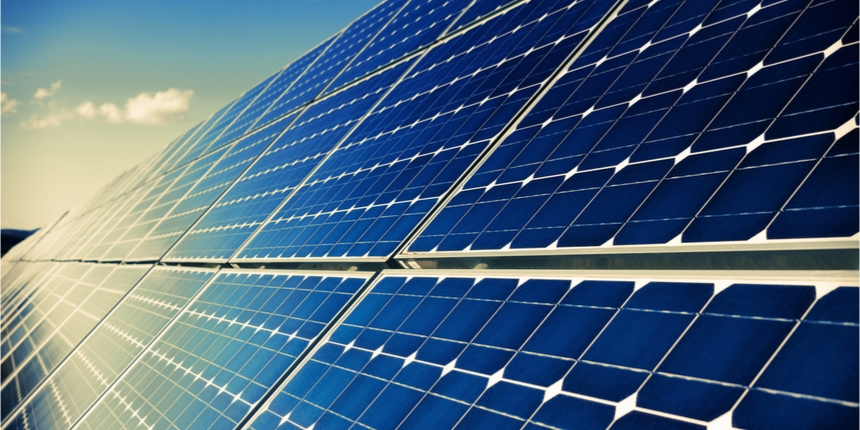[](http://)

This is my first notebook and I gained a lot of insight from these resources when performing the analysis:
* https://www.kaggle.com/virosky/how-to-manage-a-solar-power-plant
* https://www.kaggle.com/lumierebatalong/solar-power-machine-learning-i
* https://www.kaggle.com/srinuti/solar-power-plant-analysis \
Make sure to check them out and upvote their work! 

In [ ]:
import pandas as pd

data = pd.read_csv('../input/solar-power-generation-data/Plant_1_Generation_Data.csv')
data

In [ ]:
data.head()

In [ ]:
data.isnull()
#check for missing values

In [ ]:
#check for any missing values 
data.isnull().sum()

In [ ]:
#type of data of each column
data.dtypes

In [ ]:
data.select_dtypes(include=['object'])

# Generate the sensor data

creating a panda data file in this format

index    time    DC power    Temperature


In [ ]:
data_s = data[data['SOURCE_KEY'] == '1BY6WEcLGh8j5v7']


In [ ]:
data_weather = pd.read_csv('../input/solar-power-generation-data/Plant_1_Weather_Sensor_Data.csv')
data_weather

In [ ]:
list_kaan = []
data_s['DATE_TIME'] = pd.to_datetime(data_s['DATE_TIME'])
for i in range(3154):
    for j in range(3182):
        if data_s['DATE_TIME'][i] == data_weather['DATE_TIME'][j]:
            list_kaan.append([ data_weather['DATE_TIME'][j], data_s['DC_POWER'][i], data_weather['AMBIENT_TEMPERATURE'][j] ])

print(list_kaan)



In [ ]:
#testing
data_s['DATE_TIME'][0]

data_kaan = pd.concat([data_s['DATA_TIME'], data_s['DC_POWER']], axis=1)

In [ ]:
#here we exchange the column datetime as index 

data_weather.set_index('DATE_TIME',inplace = True)
data_weather.index = pd.to_datetime(data_weather.index)

print(data.index.dtype)

Module T is the temperature of the surface of the PV array.
Ambient temperature is the air temperature of any object or environment where equipment is stored.

Question: Which source key has the highest total yield and why?

In [ ]:
max_total_yiled = data['TOTAL_YIELD'].max()
max_total_yiled_index = data['TOTAL_YIELD'].idxmax()
print(max_total_yiled_index)

print(data.loc[[68297]])

In [ ]:
#we want to see why inverter 7JYdWkrLSPkdwr4 has the highest total yield, meybe its becasue of the weather
data_weather.loc['2020-05-17 18:30:00']
#Hence we get the important data at that date

In [ ]:
print(data_weather['AMBIENT_TEMPERATURE'].idxmax())
print(data_weather['AMBIENT_TEMPERATURE'].max())

#look at the datetime, it seems that on the 17-05-2020
#we had the highest ambient temperature,
#the datetime of highest total yield and the highest ambient temperature are the same, 

In [ ]:
print(data_weather['MODULE_TEMPERATURE'].idxmax())

print(data_weather['MODULE_TEMPERATURE'].max())

#the values for both datetime and temp are different compared to expected (cell 50)

In [ ]:
#Here we take all nonzero DC values and plot them on histogram
DC_list=[]
for i in data['DC_POWER']:
    if i>0:
        DC_list.append(i)
DC_list
DC_list.sort()
DC_list.reverse()
len(DC_list)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.distplot( DC_list , color="blue")
 
plt.title('Histogram of DC power')
plt.xlabel('DC current generated')
plt.ylabel('Frequency')

In [ ]:
AC_list=[]
for i in data['AC_POWER']:
    if i>0:
        AC_list.append(i)
AC_list
#AC_list.sort()
#AC_list.reverse()
len(AC_list)

In [ ]:
sns.distplot( AC_list , color="red")
 

plt.title('Histogram of AC power')
plt.xlabel('AC current generated')
plt.ylabel('Frequency')

# Output power vs efficiency

In [ ]:
#eff = np.linspace(0.6,1.,36827)
#AC_list.reverse()
AC_list.sort()
DC_list.sort()
#print(DC_list)
#DC_list.sort
#res = [i / 10 for i in AC_list]
eff = [i/j for i,j in zip(AC_list,DC_list)]

plt.plot(AC_list,eff)
plt.xlabel('Output power in kW')
plt.ylabel('efficiency AC/DC')
plt.title('Output power vs efficiency')
#compare it to a real life inverter efficency

## Compare to actual plot
source: https://www.e-education.psu.edu/eme812/node/738

[!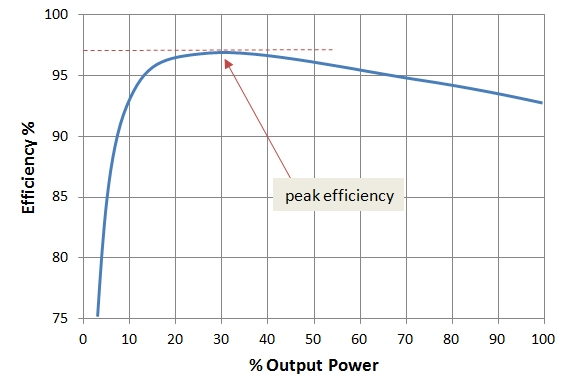](http://)

# Expore data

In [ ]:
sns.distplot( data['TOTAL_YIELD'] , color="green")
plt.title('Histogram of total yield')

In [ ]:
data['DAILY_YIELD']
DY_list=[]
for i in data['DAILY_YIELD']:
    if i>0:
        DY_list.append(i)
DY_list
DY_list.sort()
DY_list.reverse()
DY_list

In [ ]:
sns.distplot( DY_list , color="red")
 

plt.title('Histogram of daily yield')
plt.xlabel('Daily yield')
plt.ylabel('Frequency')

What is the mean value of daily yield?

In [ ]:
data['DAILY_YIELD'].mean()

In [ ]:
data = pd.read_csv('../input/solar-power-generation-data/Plant_1_Generation_Data.csv')
data.head()

got some help from https://www.kaggle.com/virosky/how-to-manage-a-solar-power-plant

In [ ]:
data.drop('PLANT_ID',1,inplace=True)
data

In [ ]:
data['DATE_TIME']= pd.to_datetime(data['DATE_TIME'],format='%d-%m-%Y %H:%M')

In [ ]:
data_weather = pd.read_csv('../input/solar-power-generation-data/Plant_1_Weather_Sensor_Data.csv')

In [ ]:
data_weather['DATE_TIME']= pd.to_datetime(data_weather['DATE_TIME'],format='%Y-%m-%d %H:%M:%S')

In [ ]:
data_weather

In [ ]:
data_weather.drop('PLANT_ID',1)

In [ ]:
#so I took this from this resource:https://www.kaggle.com/virosky/how-to-manage-a-solar-power-plant
#It appears he changes the dataframe it a wierd way so that it fixes everything visually
df_gen=data.groupby('DATE_TIME').sum().reset_index()
#Returns numpy array of datetime.time. The time part of the Timestamps.
df_gen['time']=df_gen['DATE_TIME'].dt.time

df_gen.plot( x ='DATE_TIME', y = 'DAILY_YIELD',linewidth = 1)
plt.xticks(rotation=45)
plt.tight_layout()

In [ ]:
df_gen['AC_POWER'].max()

In [ ]:
df_gen.plot(x = 'DATE_TIME',y = 'AC_POWER')
df_gen.plot(x = 'DATE_TIME', y = 'DC_POWER')

In [ ]:
#used resource https://www.kaggle.com/lumierebatalong/solar-power-machine-learning-i
#and https://www.kaggle.com/lumierebatalong/solar-power-machine-learning-i
df_gen.set_index('time').drop('DATE_TIME',1)[['DC_POWER','AC_POWER']].plot(style='.',legend=True)
df_gen.groupby('time')['DC_POWER'].agg('mean').plot(legend = True,colormap='Reds_r')
df_gen.groupby('time')['AC_POWER'].agg('mean').plot(legend = True,colormap='Reds_r')

In [ ]:
#used resource https://www.kaggle.com/lumierebatalong/solar-power-machine-learning-i
df_gen.set_index('time').drop('DATE_TIME',1)['AC_POWER'].plot(style='.',legend=True,color='darkorange')
df_gen.groupby('time')['AC_POWER'].agg('mean').plot(legend = True,colormap='Reds_r')

In [ ]:
daily_gen = df_gen.copy()

#take the date from the ['DATE_TIME'] data
#Returns numpy array of python datetime.date objects (namely, the date part of Timestamps without timezone information).
daily_gen['date'] = daily_gen['DATE_TIME'].dt.date

daily_gen = daily_gen.groupby('date').sum()

#fig,ax = plt.subplots(ncols=2,dpi=100,figsize=(20,5))
daily_gen['DAILY_YIELD'].plot()

plt.xticks(rotation = 45)#(x = 'DATE_TIME', y = 'DAILY_YIELD')

plt.show()

In [ ]:
daily_gen['DAILY_YIELD'].plot(kind='bar')

In [ ]:
daily_gen['DAILY_YIELD'].hist()

In [ ]:
daily_gen['TOTAL_YIELD'].plot()
plt.xticks(rotation=45)

In [ ]:
#daily_gen['TOTAL_YIELD'] is a Series object
#daily_gen is a DataFrame object

daily_gen['TOTAL_YIELD'].hist()

In [ ]:
daily_gen['TOTAL_YIELD'].plot(kind = 'bar')

In [ ]:
#Now plot these things for the weather data
data_weather

In [ ]:
df_gen=data_weather.groupby('DATE_TIME').sum().reset_index()

#Returns numpy array of datetime.time. The time part of the Timestamps.
df_gen['time']=df_gen['DATE_TIME'].dt.time

df_gen.plot( x ='DATE_TIME', y = ['AMBIENT_TEMPERATURE','MODULE_TEMPERATURE'],linewidth = 1)
#df_gen.plot(x = 'DATE_TIME', y = 'MODULE_TEMPERATURE',color = 'orange')
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.tight_layout()

In [ ]:
df_gen.set_index('time').drop('DATE_TIME',1)[['IRRADIATION']].plot(kind='line')

df_gen.groupby('time')['IRRADIATION'].agg('mean').plot(legend=True, colormap='Reds_r')

What is the total irradiation per day?

In [ ]:
#I think this is it...
df_gen['IRRADIATION'].sum()

What is the max ambient and module temperature?

In [ ]:
#AMBIENT_TEMPERATURE','MODULE_TEMPERATURE
print(df_gen['AMBIENT_TEMPERATURE'].max())
print(df_gen['MODULE_TEMPERATURE'].max())

How many inverters are there for each plant?

In [ ]:
#PLANT_1
inverters = data.groupby('SOURCE_KEY').sum().reset_index()
#df_gen=data.groupby('DATE_TIME').sum().reset_index()

#Returns numpy array of datetime.time. The time part of the Timestamps.
#df_gen['time']=df_gen['DATE_TIME'].dt.time
inverters.count()
#so we have 22 inverters

In [ ]:
df_DC_max=data.groupby('DATE_TIME').sum().reset_index()
df_DC_max

In [ ]:
#Take the ratio AC/DC to find the efficiency of the inverter, the closer it is to 1 the better,
#so we want to take all the ac and dc generated from an inverter and tak their ratio
#remember we have 22 source keys, 
#print(inverters)
#I think I already did my job, almost....

inverter_eff = []  
for index, row in inverters.iterrows():
    a = row['DC_POWER']/row['AC_POWER']
    inverter_eff.append(a)
inverters['Efficiency'] = inverter_eff
inverters

In [ ]:
#inverters.plot(x='Efficiency',y='SOURCE_KEY')
#plt.plot(inverter_eff,inverters['SOURCE_KEY'],color='green')

plt.plot(inverters['Efficiency'],inverters['SOURCE_KEY'],color='green')

#inverters['AC_POWER'].plot()
#plt.xticks(rotation=90)

In [ ]:
#correlation  
data_corr = data.corr()
data_corr

# Correlation

In [ ]:
sns.heatmap(data_corr,annot=True)

In [ ]:
data_weather_corr  = data_weather.corr()
data_weather_corr = data_weather_corr.drop('PLANT_ID')

In [ ]:
sns.heatmap(data_weather_corr)

In [ ]:
#daily_gen = df_gen.copy()

#take the date from the ['DATE_TIME'] data
#Returns numpy array of python datetime.date objects (namely, the date part of Timestamps without timezone information).
#daily_gen['date'] = daily_gen['DATE_TIME'].dt.date

#daily_gen = daily_gen.groupby('date').sum()

power_sensor = data.merge(data_weather, left_on='DATE_TIME', right_on='DATE_TIME')
power_sensor = power_sensor.drop(['SOURCE_KEY_x','PLANT_ID','SOURCE_KEY_y','TOTAL_YIELD'],axis=1)

power_sensor['DATE_TIME']=power_sensor['DATE_TIME'].dt.date
power_sensor

In [ ]:
power_sensor_corr = power_sensor.corr()
sns.heatmap(power_sensor_corr,annot=True)
plt.yticks(rotation = 0)
plt.xticks(rotation = 45)

In [ ]:
sns.pairplot(power_sensor)

# Apply Linear Regression Algorithm

In [ ]:
power_sensor_ML = data.merge(data_weather, left_on='DATE_TIME', right_on='DATE_TIME')
power_sensor_ML = power_sensor_ML.drop(['PLANT_ID','SOURCE_KEY_y','TOTAL_YIELD'],axis=1)
power_sensor_ML

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import datetime as dt
#from sklearn.linear_model import LinearRegression
#wait a second, this is a regression problem not a classification one,
#so I will use Linear regression

X = power_sensor_ML[['DATE_TIME','AMBIENT_TEMPERATURE','DC_POWER','MODULE_TEMPERATURE','IRRADIATION']]
#linear regression cant work with datetime, so covert it to interger
#X.columns = ["DATE_TIME"]
X['DATE_TIME'] = pd.to_datetime(X['DATE_TIME'])
X['DATE_TIME']=X['DATE_TIME'].map(dt.datetime.toordinal)

y = power_sensor_ML['AC_POWER']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state = 211)

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

In [ ]:
reg = linear_model.LinearRegression()

reg.fit(X_train,y_train)

y_predict = reg.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
accuracy = mean_squared_error(y_test,y_predict, squared = False)
accuracy
R_square_sk = reg.score(X_test,y_test)
print(R_square_sk) #24% accuracy.........woooooooooooooooooooooooooooooow
#let me remove datetime and see if things imporve
print(accuracy) 
#compare the accuracy with and without data, without we have 93%, with we have 92%

Let me do the same thing but only for one source key

In [ ]:
#One of the worst performing inverter's data
power_sensor_ML_1  = power_sensor_ML[power_sensor_ML['SOURCE_KEY_x']=='bvBOhCH3iADSZry']

from sklearn.model_selection import train_test_split
from sklearn import linear_model
import datetime as dt
#from sklearn.linear_model import LinearRegression
#wait a second, this is a regression problem not a classification one,
#so I will use Linear regression

X = power_sensor_ML_1[['DATE_TIME','AMBIENT_TEMPERATURE','DC_POWER','MODULE_TEMPERATURE','IRRADIATION']]
#linear regression cant work with datetime, so covert it to interger
#X.columns = ["DATE_TIME"]
X['DATE_TIME'] = pd.to_datetime(X['DATE_TIME'])
X['DATE_TIME']=X['DATE_TIME'].map(dt.datetime.toordinal)

y = power_sensor_ML_1['AC_POWER']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state = 211)

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

#kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = KNeighborsRegressor()
#reg = linear_model.LinearRegression()

model.fit(X_train,y_train)

y_predict = reg.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
accuracy = mean_squared_error(y_test,y_predict, squared = False)

R_square_sk = reg.score(X_test,y_test)
print(R_square_sk) #24% accuracy.........woooooooooooooooooooooooooooooow
#let me remove datetime and see if things imporve
print(accuracy) 
#for only one source we get 80%